<a href="https://colab.research.google.com/github/glee1228/dsc2019/blob/master/dsc2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science Competition 2019 
#### coding by glee1228@naver.com


### Colab 연동하기

In [1]:
from google.colab import drive
import os

if os.path.exists('/content/gdrive')==False:
  drive.mount('/content/gdrive')
  print('Google Drive is mounted\n')
else:
  print('Google Drive is already mounted\n')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Google Drive is mounted



### 시각화 라이브러리 import

In [5]:
import matplotlib
import matplotlib.pyplot as plt

print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Matplotlib version 3.0.3


In [6]:
import seaborn as sns
print("Seaborn version : ", sns.__version__)
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

Seaborn version :  0.9.0


### 한글폰트 설정하기

In [0]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq


In [8]:
import matplotlib.font_manager as fm  # 폰트 관련 용도
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 47
nanum_font number: 31


In [9]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.7
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 12.0


In [10]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [0]:
# 우선 fm._rebuild() 를 해주면 이제 준비가 완료되었다.
fm._rebuild()

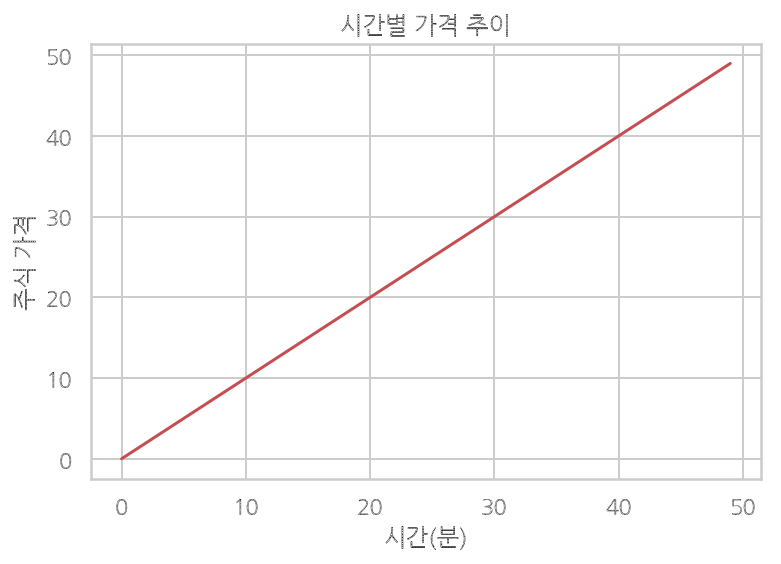

In [12]:
# 그려보자
plt.plot(range(50), range(50), 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

### 데이터 확인하기

In [13]:
! ls /content/gdrive/My\ Drive/Colab\ Notebooks/dsc2019

DSC2019_예선_데이터.xlsx   st_data_goldKorea.tsv       st_data_oilForeign.tsv
st_data_exchange.tsv	   st_data_goodsForeign.tsv    st_data_oilKorea.tsv
st_data_foreignCharge.tsv  st_data_itemChargeFull.tsv
st_data_goldForeign.tsv    st_data_koreaIndex.tsv


### 학습데이터 로딩

In [30]:
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv

# 학습데이터 로딩
dsc2019 = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/dsc2019/DSC2019_예선_데이터.xlsx')

goldKorea = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goldKorea.tsv',sep='\t') 
goldForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goldForeign.tsv',sep='\t')
oilKorea = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_oilKorea.tsv',sep='\t')
oilForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_oilForeign.tsv',sep='\t')
exchange = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_exchange.tsv',sep='\t')
goodsForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goodsForeign.tsv',sep='\t')
foreignCharge = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_foreignCharge.tsv',sep='\t')
itemChargeFull = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_itemChargeFull.tsv',sep='\t')
koreaIndex = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_koreaIndex.tsv',sep='\t')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 우선 금(Gold) 과 유가(Oil) , 원자재(Goods) 데이터의 통계량과 분포형태 및 대칭정도를  확인해보자! 

st_data_goldForeign.tsv

st_data_oilForeign.tsv

st_data_goodsForeign.tsv


In [0]:
import datetime

def convertToDatetime(df):
  try:
    dates=[]
    for i in df['date']:
      date=str(i)
      convertDate = datetime.datetime.strptime(date,'%Y%m%d').date()
      dates.append(convertDate)
  
    df['date'] = pd.to_datetime(dates)
  except :
    print('Datetime으로 type이 이미 변환되었습니다.')
  return df

def groupByItem(df):
  return df.groupby(df['itemcode'])


def setDateIndex(df):
  df=df.set_index('date',inplace=False)
  return df

def getItemCodes(df):
  return df['itemcode'].unique()

def getItemNames(df):
  return df['itemname'].unique()

def getCodeNames(df):
  codes = getItemCodes(df)
  names = getItemNames(df)
  return zip(codes,names)

def getGraph(df,colName):
  dummy=setDateIndex(df)
  code = getItemCodes(dummy)
  name = getItemNames(dummy)
  print('{}({})'.format(name[0],code[0]))
  end_date = dummy.index[-1] + datetime.timedelta(days=10)
  plt.plot(dummy.index,dummy[colName],label=name)
  plt.text(end_date, dummy[colName][-1], str(name[0]), weight = 'bold', fontsize=12)
  plt.xlabel(dummy.index.name)
  plt.ylabel(colName)
    

### 모든 데이터들 dictionary로 묶자

In [34]:
# Date (Int) -> Date(DateTime)
goldKorea=convertToDatetime(goldKorea)
goldForeign=convertToDatetime(goldForeign)
oilKorea=convertToDatetime(oilKorea)
oilForeign=convertToDatetime(oilForeign)
exchange=convertToDatetime(exchange)
goodsForeign=convertToDatetime(goodsForeign)
foreignCharge=convertToDatetime(foreignCharge)
itemChargeFull=convertToDatetime(itemChargeFull)
koreaIndex=convertToDatetime(koreaIndex)


allDataDict={'goldKorea':goldKorea,'goldForeign':goldForeign,'oilKorea':oilKorea,'oilForeign':oilForeign,'exchange':exchange,'goodsForeign':goodsForeign,'foreignCharge':foreignCharge,'itemChargeFull':itemChargeFull,'koreaIndex':koreaIndex}


Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.


### 금의 item종류

In [17]:
print(goldForeign['itemcode'].unique())
print(goldForeign['itemname'].unique())

['COM@GC' 'NYM@PA' 'NYM@PL' 'COM@SI']
['국제 금' '팔라듐' '백금' '은']


### 원유의 item종류

In [18]:
print(oilForeign['itemcode'].unique())
print(oilForeign['itemname'].unique())

['IPE@EB' 'NYM@CL' 'NYM@DC']
['브렌트유' 'WTI(서부텍사스유) ' '두바이유']


### 원자재의 item종류

In [19]:
print(goodsForeign['itemcode'].unique())
print(goodsForeign['itemname'].unique())

['LME@AAY' 'CBT$BO' 'CBT$C' 'LME@CDY' 'NYM@HO' 'LME@NDY' 'NYM@NG'
 'LME@PDY' 'CBT$RR' 'CBT$S' 'NYB@SB' 'LME@SDY' 'CBT$SM' 'CBT$W' 'LME@ZDY']
['알루미늄합금' '대두유' '옥수수' '구리' '난방유' '니켈' '천연가스' '납' '쌀' '대두' '설탕' '주석' '대두박'
 '소맥' '아연']


In [0]:
gGoldForeign=goldForeign.groupby(goldForeign['itemcode'])
gOilForeign=oilForeign.groupby(oilForeign['itemcode'])
gGoodsForeign = goodsForeign.groupby(goodsForeign['itemcode'])

In [21]:
print(goldForeign.info())
print(goldKorea.info())
print(type(gGoldForeign))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 8 columns):
itemcode      1333 non-null object
itemname      1333 non-null object
date          1333 non-null datetime64[ns]
close_val     1333 non-null float64
change_val    1327 non-null float64
open_val      1333 non-null float64
high_val      1333 non-null float64
low_val       1333 non-null float64
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 83.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 10 columns):
date                 323 non-null datetime64[ns]
deal_val             323 non-null float64
change_val           323 non-null float64
change_rate          323 non-null float64
buy_val              323 non-null float64
sell_val             323 non-null float64
deposit_val          323 non-null float64
withdraw_val         323 non-null float64
international_val    323 non-null float64
usd_rate             323 non-null 

## 데이터 시각화 
해외 유가, 금, 원자재 그래프 시각화하기!


브렌트유(IPE@EB)
WTI(서부텍사스유) (NYM@CL)
두바이유(NYM@DC)


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


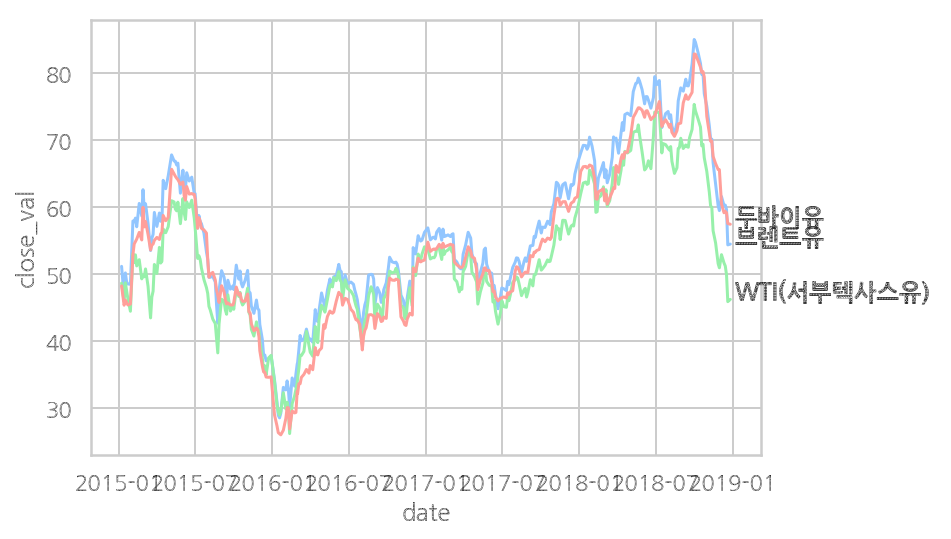

국제 금(COM@GC)
은(COM@SI)
팔라듐(NYM@PA)
백금(NYM@PL)


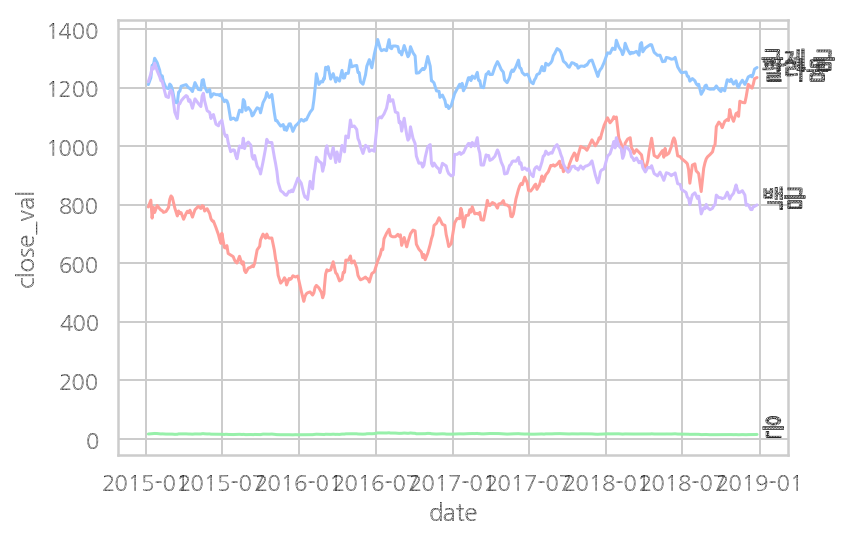

대두유(CBT$BO)
옥수수(CBT$C)
쌀(CBT$RR)
대두(CBT$S)
대두박(CBT$SM)
소맥(CBT$W)
알루미늄합금(LME@AAY)
구리(LME@CDY)
니켈(LME@NDY)
납(LME@PDY)
주석(LME@SDY)
아연(LME@ZDY)
설탕(NYB@SB)
난방유(NYM@HO)
천연가스(NYM@NG)


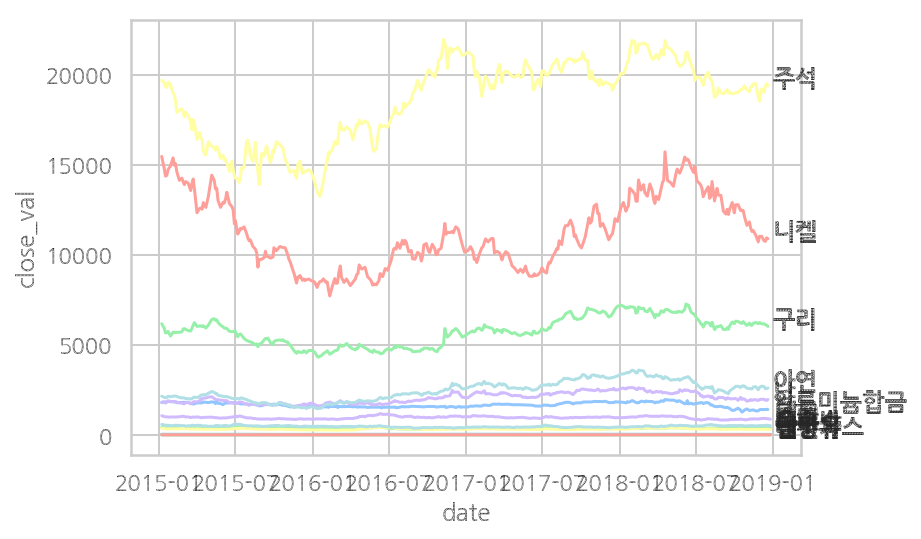

In [22]:
# 종가를 시계열로 시각화
for id, group in gOilForeign:
  getGraph(group,'close_val')
plt.show()


for id, group in gGoldForeign:
  getGraph(group,'close_val')
plt.show()

for id, group in gGoodsForeign:
  getGraph(group,'close_val')
plt.show()


그래프 시각화를 보면, 팔라듐의 그래프 형태가 금 종류 중 가장 특이한 형태를 보이고 있는데, 어떤 이슈가 있을까?

## 데이터 중심화 경향을 보자

In [0]:
def showDescribe(groupdf):
  for id, group in groupdf:
    dummy=setDateIndex(group)
    code = getItemCodes(dummy)
    name = getItemNames(dummy)
    print('{}({})'.format(name[0],code[0]))
    print(group['close_val'].describe())
    

In [24]:
showDescribe(gOilForeign)
showDescribe(gGoldForeign)

브렌트유(IPE@EB)
count    333.000000
mean      56.134294
std       11.858035
min       28.550000
25%       48.290000
50%       54.470000
75%       63.690000
max       84.980000
Name: close_val, dtype: float64
WTI(서부텍사스유) (NYM@CL)
count    333.000000
mean      51.848378
std       10.090894
min       26.210000
25%       45.830000
50%       50.180000
75%       59.130000
max       75.300000
Name: close_val, dtype: float64
두바이유(NYM@DC)
count    331.000000
mean      53.774314
std       12.177522
min       26.020000
25%       45.615000
50%       52.760000
75%       61.775000
max       82.820000
Name: close_val, dtype: float64
국제 금(COM@GC)
count     333.000000
mean     1232.231231
std        71.461738
min      1050.800000
25%      1194.100000
50%      1235.000000
75%      1283.400000
max      1364.900000
Name: close_val, dtype: float64
은(COM@SI)
count    333.000000
mean      16.350574
std        1.434780
min       13.666000
25%       15.345000
50%       16.436000
75%       17.143000
max       20.6

## 분포형태와 대칭정도를 분석해보자!
왜도(skewness) : 자료의 대칭성을 알아 볼 수 있다. 꼬리가 오른쪽으로 길면 양수의 왜도, 꼬리가 왼쪽으로 길면 음수의 왜도이다.

첨도(kurtosis) :정규 분포 대비, 데이터 분포의 뾰족한 정도를 확인할 수 있다.

In [0]:
from scipy.stats import skew
from scipy.stats import kurtosis


def getSkewKurtosis(df,colName):
  dummy=df[colName]
  return skew(dummy),kurtosis(dummy)

#groupby된 dataframe에서 가장 크고 작은 Skewness,Kurtosis의 이름을 출력하고 반환한다.
#시간대별로 1개월,3개월,6개월,1년단위로 잘라서 넣어봐도 괜찮을 것 같다.

#return dict(key:name, value:[skewness,kurtosis]) type
def getDictSkewKurtosis(groupdf,colName):
  skDict = {}  
  for id, group in groupdf:
    skewVal=0
    kurtosisVal = 0
    skewVal,kurtosisVal = getSkewKurtosis(group,colName)
    itemname = getItemNames(group)[0]
    skDict[itemname]=[skewVal,kurtosisVal]
  
  return skDict


def getMaxMinVal(dic,index):
  valueList=[]
  
  for key,value in dic.items():
#     if index==0:
#       print('{}의 왜도(skewness)는 {}'.format(key,value[index]))
#     elif index==1:
#       print('{}의 첨도(kurtosis)는 {}'.format(key,value[index]))
    
    valueList.append(value[index])
  maxVal=max(valueList)
  minVal=min(valueList)
  return maxVal,minVal
  

def analysisDict(dic):
  skewHigh,skewLow = getMaxMinVal(dic,0)
  kurtosisHigh, kurtosisLow = getMaxMinVal(dic,1)
  
  print('{} 중에서 평가합니다. '.format(list(dic.keys())))
  print('')
  if skewHigh>0 and skewLow>0:
    print('해당 데이터들은 모두 좌측으로 데이터가 치우져있습니다.')
  elif skewHigh<0 and skewLow<0:
    print('해당 데이터들은 모두 우측으로 데이터 분포가 치우쳐져 있습니다.')
  else :
    print('해당 데이터들은 왜도(skewness)의 특징이 모두 같지는 않습니다.')
    
  if kurtosisHigh<3 and kurtosisLow<3:
    print('해당 데이터들은 모두 정규분포보다 데이터 분포가 퍼져 있습니다.')
  elif kurtosisHigh>3 and kurtosisLow>3:
    print('해당 데이터들은 모두 정규분포보다 데이터 분포가 중앙에 집중 되어 있습니다.')
  else :
    print('해당 데이터들은 첨도(kurtosis)의 특징이 모두 같지는 않습니다')
  
  
  print('max Skewness value은 {} 이고, min Skewness value은 {} 입니다'.format(skewHigh,skewLow))
  print('max kurtosis value은 {} 이고, min kurtosis value은 {} 입니다'.format(kurtosisHigh,kurtosisLow))
  print()

In [26]:
dic1 = getDictSkewKurtosis(gOilForeign,'close_val')
dic2 = getDictSkewKurtosis(gGoldForeign,'close_val')
dic3 = getDictSkewKurtosis(gGoodsForeign,'close_val')

analysisDict(dic1)
analysisDict(dic2)
analysisDict(dic3)

['브렌트유', 'WTI(서부텍사스유) ', '두바이유'] 중에서 평가합니다. 

해당 데이터들은 모두 좌측으로 데이터가 치우져있습니다.
해당 데이터들은 모두 정규분포보다 데이터 분포가 퍼져 있습니다.
max Skewness value은 0.2810707721027385 이고, min Skewness value은 0.16060428525459722 입니다
max kurtosis value은 -0.28367436245456146 이고, min kurtosis value은 -0.3744093901243071 입니다

['국제 금', '은', '팔라듐', '백금'] 중에서 평가합니다. 

해당 데이터들은 왜도(skewness)의 특징이 모두 같지는 않습니다.
해당 데이터들은 모두 정규분포보다 데이터 분포가 퍼져 있습니다.
max Skewness value은 0.6172025603090334 이고, min Skewness value은 -0.47091208479140567 입니다
max kurtosis value은 0.18396461964090616 이고, min kurtosis value은 -0.8742654389263262 입니다

['대두유', '옥수수', '쌀', '대두', '대두박', '소맥', '알루미늄합금', '구리', '니켈', '납', '주석', '아연', '설탕', '난방유', '천연가스'] 중에서 평가합니다. 

해당 데이터들은 왜도(skewness)의 특징이 모두 같지는 않습니다.
해당 데이터들은 모두 정규분포보다 데이터 분포가 퍼져 있습니다.
max Skewness value은 0.8943255723361463 이고, min Skewness value은 -0.5357072765403734 입니다
max kurtosis value은 2.1269535540811804 이고, min kurtosis value은 -1.22723197777784 입니다



### 데이터를 회귀분석에 맞게 정제해볼까?

In [37]:
for key in allDataDict.keys():
  print(key)

goldKorea
goldForeign
oilKorea
oilForeign
exchange
goodsForeign
foreignCharge
itemChargeFull
koreaIndex


In [40]:
gKoreaIndex=groupByItem(koreaIndex)
getItemCodes(gKoreaIndex)

itemcode
KOSDAQ    [KOSDAQ]
KOSPI      [KOSPI]
KPI200    [KPI200]
Name: itemcode, dtype: object

In [0]:
y_train=pd.DataFrame()

for id,group in gKoreaIndex:
  dummy=setDateIndex(group)
  if id=='KOSPI':
    y_train = dummy['close_val']

print('close_val 컬럼이 있는 데이터는 다음과 같습니다.')
print()

print('데이터 병합')

for key,value in allDataDict.items():
  if key=='itemChargeFull' and 'itemcode' in value.columns and 'close_val' in value.columns:
    gdf = groupByItem(value)
    for id,group in gdf:
      dummy = convertToDatetime(group)
      dummy=setDateIndex(dummy)
      code = getItemCodes(dummy)
      name = getItemNames(dummy)
      closeVal = dummy['close_val']
      print('{}({} - {})'.format(name[0],code[0],len(closeVal)))
      y_train.append(closeVal, ignore_index = False)
print('-----------------------------------------')


In [87]:
print(tempDf.columns)

Index(['close_val'], dtype='object')
Empty DataFrame
Columns: [close_val]
Index: []


In [51]:
print(y_train.shape)

(323,)


### Lasso regression을 활용하여 활용 변수를 찾아보자

In [27]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3,normalize=True)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_cv)

mse = np.mean((pred_cv - y_cv)**2)

print(mse)

score=lassoReg.score(x_cv,y_cv)
print(score)

NameError: ignored